In [1]:
## Python scripts for US-Elections
## Voting tendencies by education level


In [2]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib.lines import Line2D

# Load csv
education = pd.read_csv("../data/clean_data/analysis_data/voting_tendencies_by_education_level_2016.csv")


In [3]:
education.head()

,state,bachelor_or_higher_perc,percentage_registered,democrats,republicans
0,Alabama,23.257142,0.664,34.7778,54.7778
1,Alaska,27.100000,0.644,36.0000,46.6667
2,Arizona,27.677778,0.608,41.2333,42.9667
3,Arkansas,21.375000,0.558,35.1667,53.5833
4,California,32.411321,0.519,53.6250,31.4688


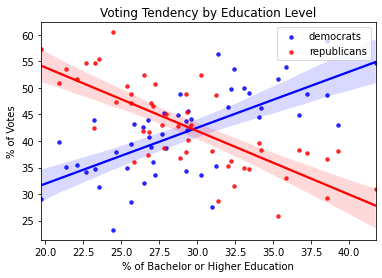

In [4]:
# x, y labels
education_bachelor_higher = education["bachelor_or_higher_perc"]
democrats = education["democrats"]
republicans = education["republicans"]

# plot voting tendencies with regression line
sns.regplot(x="bachelor_or_higher_perc", y="democrats", data=education, label = "democrats", scatter_kws={"color": "blue", 's':12}, line_kws={"color": "blue"})
sns.regplot(x="bachelor_or_higher_perc", y="republicans", data=education, label = "republicans", scatter_kws={"color": "red",'s':12}, line_kws={"color": "red"})

plt.title('Voting Tendency by Education Level')
plt.xlabel('% of Bachelor or Higher Education')
plt.ylabel('% of Votes')
plt.legend()
plt.savefig("../visualisations/voting_tendencies_education_level.jpg", dpi = 200)
plt.show()



In [5]:
## Voting tendencies by poverty level

In [6]:
# Load csv
poverty = pd.read_csv("../data/clean_data/analysis_data/voting_tendencies_by_poverty_level_2016.csv")

# Preview table
poverty.head()

,state,below_poverty_percentage,percentage_registered,democrats,republicans
0,Alabama,14.642857,0.664,34.7778,54.7778
1,Alaska,9.800000,0.644,36.0000,46.6667
2,Arizona,11.288889,0.608,41.2333,42.9667
3,Arkansas,14.900000,0.558,35.1667,53.5833
4,California,10.405660,0.519,53.6250,31.4688


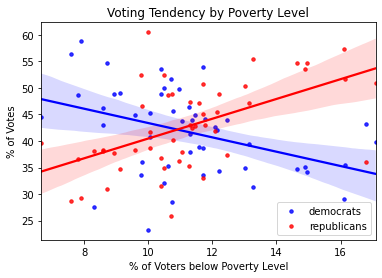

In [7]:
# x, y labels
education_bachelor_higher = poverty["below_poverty_percentage"]
democrats = poverty["democrats"]
republicans = poverty["republicans"]

# plot voting tendencies with regression line
sns.regplot(x="below_poverty_percentage", y="democrats", data=poverty, label = "democrats", scatter_kws={"color": "blue", 's':12}, line_kws={"color": "blue"})
sns.regplot(x="below_poverty_percentage", y="republicans", data=poverty, label = "republicans", scatter_kws={"color": "red",'s':12}, line_kws={"color": "red"})

plt.title('Voting Tendency by Poverty Level')
plt.xlabel('% of Voters below Poverty Level')
plt.ylabel('% of Votes')
plt.legend()
plt.savefig("../visualisations/voting_tendencies_poverty_level.jpg", dpi = 200)
plt.show()


In [8]:
## Historical voting preference

In [9]:
# load csv
vote_history = pd.read_csv('../data/clean_data/historical_data/us_1976_2018_house.csv', encoding= 'unicode_escape')

In [10]:
# preview table
vote_history.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version
0,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Bill Davenport,democrat,False,total,58906,157170,False,20200424
1,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,Jack Edwards,republican,False,total,98257,157170,False,20200424
2,1976,Alabama,AL,1,63,41,US House,1,gen,False,False,NaN,NaN,True,total,7,157170,False,20200424
3,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,J. Carole Keahey,democrat,False,total,66288,156362,False,20200424
4,1976,Alabama,AL,1,63,41,US House,2,gen,False,False,NaN,NaN,True,total,5,156362,False,20200424


In [11]:
# select columns, create calculated columns and drop others
vote_history = vote_history[['year', 'state_po', 'party', 'candidatevotes', 'totalvotes']]
vote_history['percvotes'] = vote_history['candidatevotes'] / vote_history['totalvotes']
vote_history.drop('candidatevotes', axis = 'columns', inplace = True)
vote_history.drop('totalvotes', axis = 'columns', inplace = True)
print(vote_history)

       year state_po        party  percvotes
0      1976       AL     democrat   0.374792
1      1976       AL   republican   0.625164
2      1976       AL          NaN   0.000045
3      1976       AL     democrat   0.423939
4      1976       AL          NaN   0.000032
...     ...      ...          ...        ...
29631  2018       MD          NaN   0.001028
29632  2018       MD     democrat   0.681674
29633  2018       MD  libertarian   0.015197
29634  2018       MD   republican   0.302274
29635  2018       MD          NaN   0.000855

[29636 rows x 4 columns]


In [12]:
# delete other parties
vals = ['republican', 'democrat']
vote_history['party'] = vote_history.party.where(vote_history.party.isin(vals), 'other')
print (vote_history)

       year state_po       party  percvotes
0      1976       AL    democrat   0.374792
1      1976       AL  republican   0.625164
2      1976       AL       other   0.000045
3      1976       AL    democrat   0.423939
4      1976       AL       other   0.000032
...     ...      ...         ...        ...
29631  2018       MD       other   0.001028
29632  2018       MD    democrat   0.681674
29633  2018       MD       other   0.015197
29634  2018       MD  republican   0.302274
29635  2018       MD       other   0.000855

[29636 rows x 4 columns]


In [13]:
# pivot table to calculate State preferred party
pivot = pd.pivot_table(vote_history, values = 'percvotes', index = ['year', 'state_po'], columns = 'party').fillna(0)
print(pivot)

party          democrat     other  republican
year state_po                                
1976 AK        0.289270  0.002470    0.708260
     AL        0.717011  0.002097    0.491038
     AR        0.850790  0.000048    0.482528
     AZ        0.486595  0.035406    0.469147
     CA        0.582357  0.033747    0.415535
...                 ...       ...         ...
2018 VT        0.692040  0.016148    0.259515
     WA        0.565196  0.287098    0.436968
     WI        0.540230  0.009180    0.511027
     WV        0.406757  0.030651    0.583026
     WY        0.297662  0.022160    0.635857

[1100 rows x 3 columns]


In [14]:
# label the winning party
pivot['win'] = pivot.idxmax(axis=1)
pivot['max'] = pivot[['democrat', 'other', 'republican']].max(axis=1)
print(pivot)

party          democrat     other  republican         win       max
year state_po                                                      
1976 AK        0.289270  0.002470    0.708260  republican  0.708260
     AL        0.717011  0.002097    0.491038    democrat  0.717011
     AR        0.850790  0.000048    0.482528    democrat  0.850790
     AZ        0.486595  0.035406    0.469147    democrat  0.486595
     CA        0.582357  0.033747    0.415535    democrat  0.582357
...                 ...       ...         ...         ...       ...
2018 VT        0.692040  0.016148    0.259515    democrat  0.692040
     WA        0.565196  0.287098    0.436968    democrat  0.565196
     WI        0.540230  0.009180    0.511027    democrat  0.540230
     WV        0.406757  0.030651    0.583026  republican  0.583026
     WY        0.297662  0.022160    0.635857  republican  0.635857

[1100 rows x 5 columns]


In [15]:
# create a new column to give give democrat a negative value & republican a positive value for plotting
pivot.loc[pivot['win'] == 'democrat', 'partywin'] = 0 - pivot['max'] 
pivot.loc[pivot['win'] == 'republican', 'partywin'] = 0 + pivot['max'] 
pivot.loc[pivot['win'] == 'other', 'partywin'] = 0 
print(pivot)

party          democrat     other  republican         win       max  partywin
year state_po                                                                
1976 AK        0.289270  0.002470    0.708260  republican  0.708260  0.708260
     AL        0.717011  0.002097    0.491038    democrat  0.717011 -0.717011
     AR        0.850790  0.000048    0.482528    democrat  0.850790 -0.850790
     AZ        0.486595  0.035406    0.469147    democrat  0.486595 -0.486595
     CA        0.582357  0.033747    0.415535    democrat  0.582357 -0.582357
...                 ...       ...         ...         ...       ...       ...
2018 VT        0.692040  0.016148    0.259515    democrat  0.692040 -0.692040
     WA        0.565196  0.287098    0.436968    democrat  0.565196 -0.565196
     WI        0.540230  0.009180    0.511027    democrat  0.540230 -0.540230
     WV        0.406757  0.030651    0.583026  republican  0.583026  0.583026
     WY        0.297662  0.022160    0.635857  republican  0.635

In [16]:
#drop unneeded table columns
pivot.drop('democrat', axis = 'columns', inplace = True)
pivot.drop('other', axis = 'columns', inplace = True)
pivot.drop('republican', axis = 'columns', inplace = True)
pivot.drop('win', axis = 'columns', inplace = True)
pivot.drop('max', axis = 'columns', inplace = True)
pivot.reset_index(drop=True,level=1)
print(pivot)

party          partywin
year state_po          
1976 AK        0.708260
     AL       -0.717011
     AR       -0.850790
     AZ       -0.486595
     CA       -0.582357
...                 ...
2018 VT       -0.692040
     WA       -0.565196
     WI       -0.540230
     WV        0.583026
     WY        0.635857

[1100 rows x 1 columns]


In [17]:
#unstack pivot to create desired layout to feed heatmap plot
df = pivot.unstack(level=0)
print(df)

party     partywin                                                    \
year          1976      1978      1980      1982      1984      1986   
state_po                                                               
AK        0.708260  0.554092  0.737877  0.708367  0.550202  0.564681   
AL       -0.717011 -0.730010 -0.743609 -0.734658 -0.765795 -0.671267   
AR       -0.850790 -0.675806  0.894605 -0.526413 -0.807307 -0.593943   
AZ       -0.486595  0.598356  0.515626  0.541251  0.751829  0.648066   
CA       -0.582357 -0.547657 -0.479679 -0.519441 -0.530426 -0.536616   
CO        0.526244  0.508189  0.526763  0.516831  0.630009  0.554803   
CT       -0.505308 -0.576199 -0.515994 -0.538246  0.531628 -0.554349   
DE        0.514383  0.581909  0.617994 -0.523933 -0.584617 -0.661564   
FL       -0.675991 -0.717166 -0.622450 -0.655305 -0.645949 -0.716723   
GA       -0.778672 -0.845338 -0.748898 -0.764016 -0.763373 -0.782251   
HI       -0.615757 -0.794960 -0.848304 -0.895707 -0.824565 -0.56

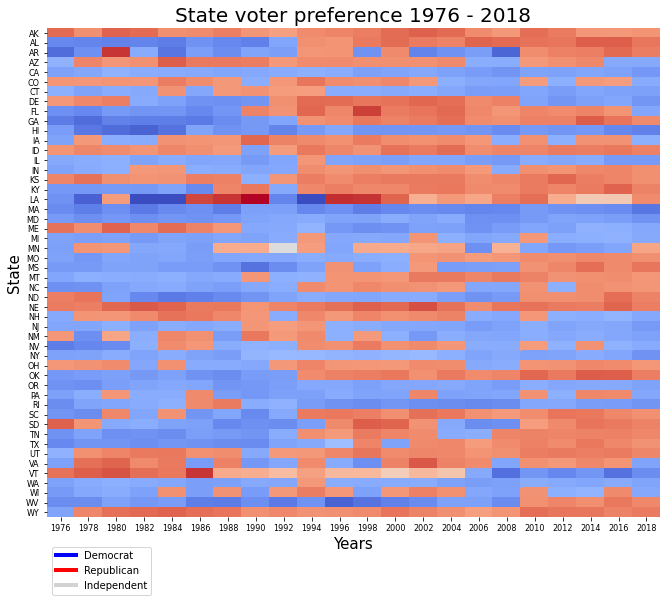

In [18]:
#create the heatmap with red colour for republican and blue for democrat, rename axes and tick labels to overcome multi-indexing header formatting
fig, ax = plt.subplots(figsize=(11, 9))
h = sns.heatmap(df, cmap = 'coolwarm', xticklabels = 1, yticklabels = 1, cbar = False)
plt.title('State voter preference 1976 - 2018', fontsize = 20) # title with fontsize 20
plt.xlabel('Years', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('State', fontsize = 15) # y-axis label with fontsize 15
trunc = lambda x: x.strip("()").split("-")[1]
tl = [trunc(t.get_text()) for t in ax.get_xticklabels()]
ax.set_xticklabels(tl,rotation=0);
plt.xticks(fontsize = 8) 
plt.yticks(fontsize = 8)

#create a custom legend for plot readability
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='r', lw=4),
                Line2D([0], [0], color='lightgray', lw=4)]
ax.legend(custom_lines, ['Democrat', 'Republican', 'Independent'], loc='upper left', bbox_to_anchor=(0.,-.05))

plt.show()